# Homework 2 (Solution)

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [63]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

## Preparing the dataset

Use only the following columns:

* engine_displacement
* horsepower
* vehicle_weight
* model_year
* fuel_efficiency_mpg


In [64]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

## Exploratory Data Analysis (EDA)

* Look at the fuel_efficiency_mpg variable. Does it have a long tail?

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

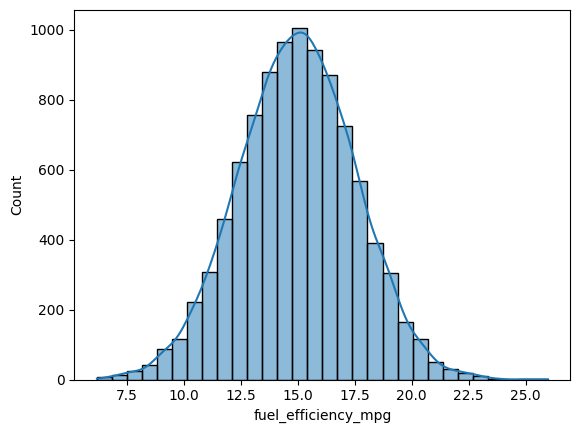

In [65]:
sns.histplot(df['fuel_efficiency_mpg'], bins=30, kde=True)

**Answer:** Does not has long tail, it looks normal distributed

In [66]:
features = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
target = 'fuel_efficiency_mpg'

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [67]:
df = df[features + [target]]
df.isnull().sum()   

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

**Answer:** horsepower  

### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

In [68]:
np.nanmedian(df['horsepower']).item()

149.0

**Answer:** 149

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [69]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [70]:
df42 = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [71]:
n = len(df42)

n_test = int(0.2 * n)  
n_val = int(0.2 * n)
n_train = n - n_test - n_val 

print(f"size: {n}")
print(f"n_train: {n_train}")
print(f"n_val: {n_val}")
print(f"n_test: {n_test}")

size: 9704
n_train: 5824
n_val: 1940
n_test: 1940


In [72]:
df_train = df42.iloc[:n_train].reset_index(drop=True) 
df_val = df42.iloc[n_train:n_train + n_val].reset_index(drop=True)
df_test = df42.iloc[n_train + n_val:].reset_index(drop=True)

## Linear Regression

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

* With 0
* With mean
* Both are equally good

In [73]:
df_fill0 = df42.fillna(0)
df_fill0.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [74]:
hp_mean = np.nanmean(df_train['horsepower'].values).item()
df_fillm = df42.fillna(hp_mean)
df_fillm.isnull().sum()



engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [75]:
def train_linear_regression(X, y,reg = 0.0):
    X = np.column_stack([np.ones(X.shape[0]), X])  # add bias term
    XTX = X.T@X + reg * np.eye(X.shape[1])
    w = np.linalg.inv(XTX)@(X.T)@y
    return w

In [76]:
def predict_linear_regression(X, w):
    X = np.column_stack([np.ones(X.shape[0]), X])  # add bias term
    y_pred = X @ w
    return y_pred

In [77]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred) ** 2)).item()

In [78]:
y_train = df_train[target]
y_val = df_val[target]

### Train fillnull 0

In [79]:
X0_train = df_train[features].fillna(0)
w0 = train_linear_regression(X0_train, y_train, reg=0)
X0_val = df_val[features].fillna(0)
y0_pred = predict_linear_regression(X0_val , w0)

### Plot pred

Text(0.5, 1.0, 'Distribution of Predicted car_fuel_efficiency')

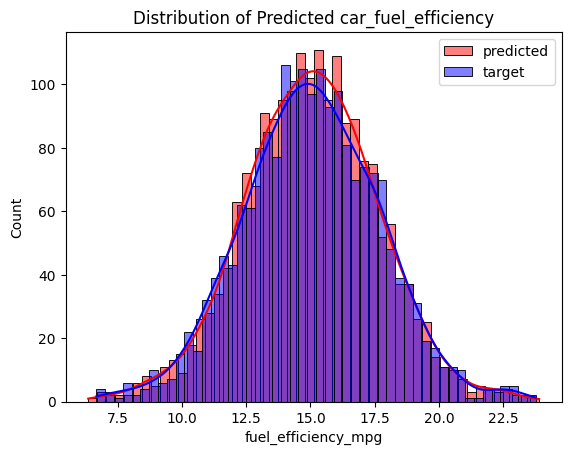

In [80]:
sns.histplot(y0_pred,color = 'red', bins=50, kde=True,alpha=0.5,label = 'predicted')
sns.histplot(y_val,color = 'blue', bins=50, kde=True,alpha=0.5,label = 'target')
plt.legend()
plt.title("Distribution of Predicted car_fuel_efficiency")

In [81]:
score0=rmse(y_val, y0_pred)
score0

0.5173782638844465

### Train fillnull mean

In [82]:
Xm_train = df_train[features].fillna(hp_mean)
wm = train_linear_regression(Xm_train, y_train, reg=0)
Xm_val = df_val[features].fillna(hp_mean)
ym_pred = predict_linear_regression(Xm_val , wm)

### Plot pred

Text(0.5, 1.0, 'Distribution of Predicted car_fuel_efficiency')

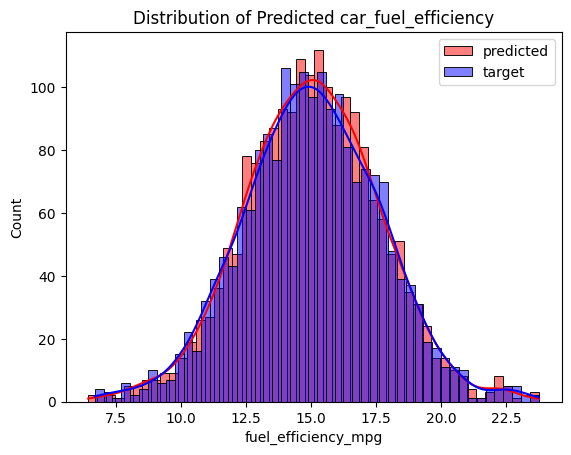

In [83]:
sns.histplot(ym_pred,color = 'red', bins=50, kde=True,alpha=0.5,label = 'predicted')
sns.histplot(y_val,color = 'blue', bins=50, kde=True,alpha=0.5,label = 'target')
plt.legend()
plt.title("Distribution of Predicted car_fuel_efficiency")

In [84]:
scorem= rmse(y_val, ym_pred)
scorem

0.46359650423345844

In [85]:
if score0 < scorem:
    better = '<'
elif score0 > scorem:
    better = '>'
else:
    better = '='

print(f"Answer: Score fillnan zero {round(score0,2)} {better} Score fillnan mean {round(scorem,2)}")

Answer: Score fillnan zero 0.52 > Score fillnan mean 0.46


**Answer:** fill with mean gives better RMSE

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100


In [86]:
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [87]:
scores = {}
X0_train = df_train[features].fillna(0)
X0_val = df_val[features].fillna(0)
for r in [0.0, 0.01, 0.1, 1, 5, 10, 100]:
    w0 = train_linear_regression(X0_train, y_train, reg=r)
    y0_pred = predict_linear_regression(X0_val , w0)
    scores[r] ={
                "rmse": round(rmse(y_val, y0_pred),2),
                "w": w0
                }
scores


{0.0: {'rmse': 0.52,
  'w': array([ 2.88273655e+01,  9.93613218e-05,  3.54221891e-03, -5.01328015e-03,
          3.42992870e-04])},
 0.01: {'rmse': 0.52,
  'w': array([ 2.49268384e+01,  1.06434230e-04,  3.54219772e-03, -5.01247825e-03,
          2.28024003e-03])},
 0.1: {'rmse': 0.52,
  'w': array([ 1.12396611e+01,  1.31253484e-04,  3.54212335e-03, -5.00966430e-03,
          9.07815352e-03])},
 1: {'rmse': 0.52,
  'w': array([ 1.73159794e+00,  1.48494735e-04,  3.54207154e-03, -5.00770953e-03,
          1.38004559e-02])},
 5: {'rmse': 0.52,
  'w': array([ 3.63807502e-01,  1.50975339e-04,  3.54206338e-03, -5.00742825e-03,
          1.44797866e-02])},
 10: {'rmse': 0.52,
  'w': array([ 1.83062466e-01,  1.51303540e-04,  3.54206149e-03, -5.00739100e-03,
          1.45695559e-02])},
 100: {'rmse': 0.52,
  'w': array([ 0.01841802,  0.00015161,  0.00354204, -0.00500736,  0.01465133])}}

In [88]:
rmin = min(scores, key=lambda x: scores[x]['rmse'])
print(f" min reg: {rmin}")
print(f" min rmse: {scores[rmin]['rmse']}")

 min reg: 0.0
 min rmse: 0.52


**Answer:** the smaller $r$ is $r=0$

**Note:** If we consider more decimals $r=0.01$ is smaller

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600


In [89]:
scores = []
dfq5 = df.copy()
for seed in range(10):
    dfq5 = dfq5.sample(frac=1, random_state=seed).reset_index(drop=True)    
    df_train = dfq5.iloc[:n_train].reset_index(drop=True) 
    df_val = dfq5.iloc[n_train:n_train + n_val].reset_index(drop=True)
    y_train = df_train[target]
    y_val = df_val[target]
    X0_train = df_train[features].fillna(0)
    X0_val = df_val[features].fillna(0)
    
    w0 = train_linear_regression(X0_train, y_train)
    y0_pred = predict_linear_regression(X0_val , w0)
    scores.append(rmse(y_val, y0_pred))
print(f"mean rmse over 10 seeds: {round(np.mean(scores).item(),3)}")
print(f"std rmse over 10 seeds: {round(np.std(scores).item(),3)}")

mean rmse over 10 seeds: 0.52
std rmse over 10 seeds: 0.006


**Answer:** std = 0.006

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5



In [92]:
df9 = df.sample(frac=1, random_state=9).reset_index(drop=True)    
df_fulltrain = df9.iloc[:n_train+n_val].reset_index(drop=True) 
df_test = df9.iloc[n_train + n_val:].reset_index(drop=True)

X0_train = df_fulltrain[features].fillna(0)
X0_test = df_test[features].fillna(0)

y_train = df_fulltrain[target]
y_test = df_test[target]


w0 = train_linear_regression(X0_train, y_train,reg = 0.001)
y0_pred = predict_linear_regression(X0_test , w0)
rmse(y_test, y0_pred)

0.5156261299169602

**Answer:** 0.515